In [2]:
import pandas as pd

# Read the dataset
df = pd.read_csv('train.csv')

# Print the first 5 rows
print(df.head())

   id  annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0   0       29367.99                 0.084           736      2528.42   
1   1       22108.02                 0.166           636      4593.10   
2   2       49566.20                 0.097           694     17005.15   
3   3       46858.25                 0.065           533      4682.48   
4   4       25496.70                 0.053           665     12184.43   

   interest_rate  gender marital_status education_level employment_status  \
0          13.67  Female         Single     High School     Self-employed   
1          12.92    Male        Married        Master's          Employed   
2           9.76    Male         Single     High School          Employed   
3          16.10  Female         Single     High School          Employed   
4          10.21    Male        Married     High School          Employed   

         loan_purpose grade_subgrade  loan_paid_back  
0               Other             C3       

In [3]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [4]:
import pandas as pd

for col in df.columns:
    print(f"Column: {col}")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"  Type: Numeric")
        print(f"  Min: {df[col].min()}, Max: {df[col].max()}")
        print(f"  Mean: {df[col].mean()}, Std: {df[col].std()}")
    else:
        print(f"  Type: Categorical/Object")
        unique_vals = df[col].unique()
        if len(unique_vals) <= 10:
            print(f"  Possible values: {unique_vals}")
        else:
            print(f"  Number of unique values: {len(unique_vals)}")
    print("-" * 50)


Column: id
  Type: Numeric
  Min: 0, Max: 593993
  Mean: 296996.5, Std: 171471.44223601784
--------------------------------------------------
Column: annual_income
  Type: Numeric
  Min: 6002.43, Max: 393381.74
  Mean: 48212.20297629101, Std: 26711.942078323063
--------------------------------------------------
Column: debt_to_income_ratio
  Type: Numeric
  Min: 0.011, Max: 0.627
  Mean: 0.12069589053088078, Std: 0.06857325850127183
--------------------------------------------------
Column: credit_score
  Type: Numeric
  Min: 395, Max: 849
  Mean: 680.9160092526187, Std: 55.42495592567738
--------------------------------------------------
Column: loan_amount
  Type: Numeric
  Min: 500.09, Max: 48959.95
  Mean: 15020.297628526214, Std: 6926.530567603591
--------------------------------------------------
Column: interest_rate
  Type: Numeric
  Min: 3.2, Max: 20.99
  Mean: 12.356345200456571, Std: 2.008958899346155
--------------------------------------------------
Column: gender
  Type: 

In [5]:
df['grade_subgrade'].value_counts()

grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036
E3     7075
E1     6891
E2     6372
E5     6084
F5     5947
F4     5535
F1     5534
F2     5203
F3     5082
A5     2471
A3     2066
A2     2018
A4     1701
A1     1600
Name: count, dtype: int64

In [6]:
df['annual_income'].describe()

count    593994.000000
mean      48212.202976
std       26711.942078
min        6002.430000
25%       27934.400000
50%       46557.680000
75%       60981.320000
max      393381.740000
Name: annual_income, dtype: float64

In [7]:
df['debt_to_income_ratio'].describe()

count    593994.000000
mean          0.120696
std           0.068573
min           0.011000
25%           0.072000
50%           0.096000
75%           0.156000
max           0.627000
Name: debt_to_income_ratio, dtype: float64

In [8]:
df['interest_rate'].describe()

count    593994.000000
mean         12.356345
std           2.008959
min           3.200000
25%          10.990000
50%          12.370000
75%          13.680000
max          20.990000
Name: interest_rate, dtype: float64

In [9]:
df['gender'].value_counts()

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

In [10]:
df['marital_status'].value_counts()

marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

In [11]:
df['education_level'].value_counts()

education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

In [12]:
df['employment_status'].value_counts()

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

In [13]:
df['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

In [14]:
# filter the dataframe when employment status is 'Employed'
df[df['employment_status'] == 'Employed']['loan_paid_back'].value_counts()

loan_paid_back
1.0    402942
0.0     47703
Name: count, dtype: int64

In [15]:
test_df = pd.read_csv('test.csv')

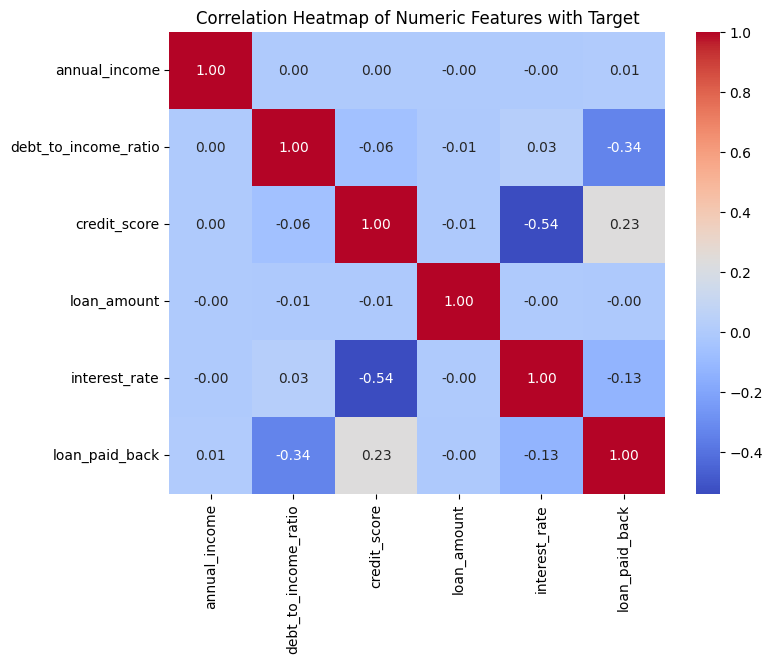

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List numeric features (excluding id)
numeric_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 
                    'loan_amount', 'interest_rate', 'loan_paid_back']

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features with Target")
plt.show()


In [17]:
df['loan_purpose'].value_counts()

loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

annual_income: 15917 outliers
debt_to_income_ratio: 17556 outliers
credit_score: 5901 outliers
loan_amount: 2902 outliers
interest_rate: 5136 outliers


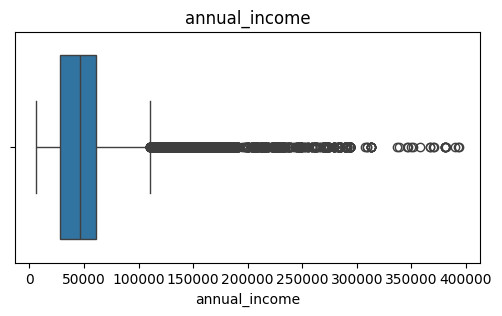

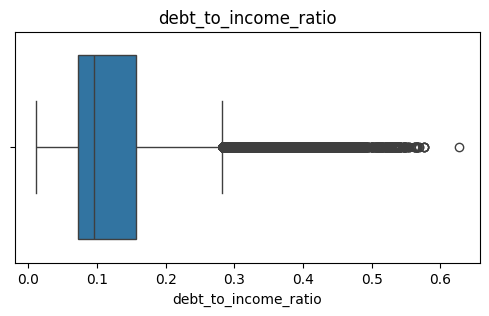

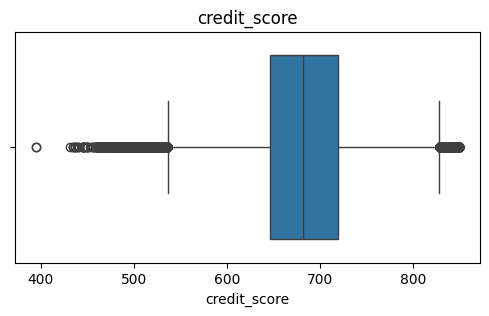

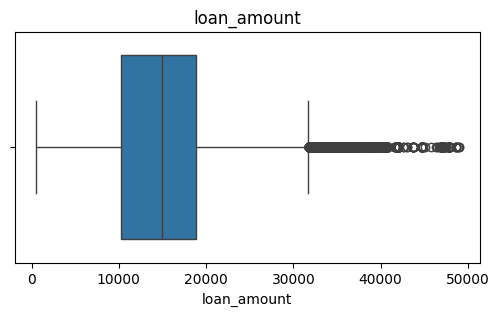

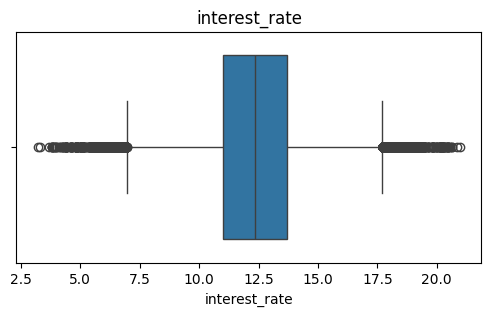

In [18]:
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")
    
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()



In [19]:
from scipy import stats
import numpy as np

for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    print(f"{col}: {len(outliers)} outliers")


annual_income: 9034 outliers
debt_to_income_ratio: 7297 outliers
credit_score: 918 outliers
loan_amount: 1112 outliers
interest_rate: 1656 outliers


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical features
categorical_features = ['gender', 'marital_status', 'education_level', 
                        'employment_status', 'loan_purpose', 'grade_subgrade']
target = 'loan_paid_back'

results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    results.append({'feature': feature, 'chi2': chi2, 'p_value': p})

# Convert to DataFrame and sort by p-value
chi2_df = pd.DataFrame(results).sort_values('p_value')
print(chi2_df)


             feature           chi2       p_value
3  employment_status  256259.857065  0.000000e+00
5     grade_subgrade   30871.161938  0.000000e+00
2    education_level     383.433795  1.055186e-81
4       loan_purpose     391.327802  1.725854e-80
0             gender      32.812778  7.495415e-08
1     marital_status       4.122237  2.485637e-01


In [21]:
def remove_outliers_zscore(df, cols, threshold=3):
    """
    Removes outliers from specified numeric columns using Z-score method.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        cols (list): List of numeric column names
        threshold (float): Z-score threshold to detect outliers (default=3)
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed
    """
    df_clean = df.copy()
    
    for col in cols:
        z_scores = np.abs(stats.zscore(df_clean[col]))
        df_clean = df_clean[z_scores <= threshold]
        
    return df_clean

df = remove_outliers_zscore(df, ["credit_score"])

In [22]:
# import pandas as pd

# def remove_outliers(df, cols):
#     """
#     Removes outliers from specified numeric columns in a DataFrame using the IQR method.
    
#     Parameters:
#         df (pd.DataFrame): Input DataFrame
#         cols (list): List of numeric column names to check for outliers
    
#     Returns:
#         pd.DataFrame: DataFrame with outliers removed
#     """
#     df_clean = df.copy()
    
#     for col in cols:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
        
#         # Keep only rows within the IQR bounds
#         df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        
#     return df_clean

# df = remove_outliers(df, ["credit_score", "debt_to_income_ratio", "interest_rate"])

Predictions: [1 1 1 ... 1 1 0]
Unique values: [0 1]
Test Accuracy: 0.9028


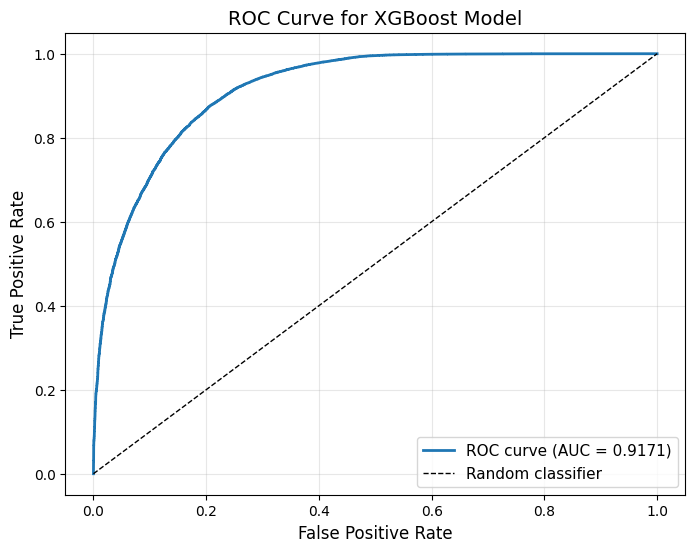

AUC Score: 0.9171


In [25]:
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Extract features and target
X_data = df[['employment_status', 'grade_subgrade', 'gender', 'education_level', 'credit_score', 'debt_to_income_ratio', 'interest_rate']].copy()
y_income = df['loan_paid_back'].values

# Separate continuous and categorical features
X_credit_score = X_data[['credit_score']].values
X_debt_to_income = X_data[['debt_to_income_ratio']].values
X_interest_rate = X_data[['interest_rate']].values
X_categorical = X_data[['employment_status', 'grade_subgrade']]

# One-hot encode categorical features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = ohe.fit_transform(X_categorical)

# Remove rows with NaN values
mask = ~(np.isnan(X_credit_score).any(axis=1)) & ~(np.isnan(X_debt_to_income).any(axis=1)) & ~(np.isnan(X_interest_rate).any(axis=1))
X_credit_score_clean = X_credit_score[mask]
X_debt_to_income_clean = X_debt_to_income[mask]
X_interest_rate_clean = X_interest_rate[mask]
X_categorical_clean = X_categorical_encoded[mask]
y_income_clean = y_income[mask]

# Scale credit_score with MinMaxScaler
scaler_credit = MinMaxScaler()
X_credit_score_scaled = scaler_credit.fit_transform(X_credit_score_clean)

# Scale interest_rate with StandardScaler
scaler_interest = StandardScaler()
X_interest_rate_scaled = scaler_interest.fit_transform(X_interest_rate_clean)

# debt_to_income_ratio is already normalized, no scaling needed
X_debt_to_income_scaled = X_debt_to_income_clean

# Combine features
X_combined = np.hstack([X_credit_score_scaled, X_debt_to_income_scaled, X_interest_rate_scaled, X_categorical_clean])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_income_clean, test_size=0.1, random_state=42)

# Train XGBoost model
model_income = xgb.XGBClassifier(
    n_estimators = 500,
    max_depth = 6,
    learning_rate = 0.1,
    eval_metric='logloss')
model_income.fit(X_train, y_train)

# Make predictions on test set
predictions = model_income.predict(X_test)
print(f'Predictions: {predictions}')
print(f'Unique values: {np.unique(predictions)}')

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the test set
y_proba = model_income.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for XGBoost Model', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print(f'AUC Score: {auc_score:.4f}')

In [24]:
import pandas as pd

# Load test data
test_data = pd.read_csv('test.csv')

# Separate continuous and categorical features from test data
X_test_credit_score = test_data[['credit_score']].values
X_test_debt_to_income = test_data[['debt_to_income_ratio']].values
X_test_interest_rate = test_data[['interest_rate']].values
X_test_categorical = test_data[['employment_status', 'grade_subgrade']]

# One-hot encode categorical features using the same encoder
X_test_categorical_encoded = ohe.transform(X_test_categorical)

# Remove rows with NaN values
mask_test = ~(np.isnan(X_test_credit_score).any(axis=1)) & ~(np.isnan(X_test_debt_to_income).any(axis=1)) & ~(np.isnan(X_test_interest_rate).any(axis=1))
X_test_credit_score_clean = X_test_credit_score[mask_test]
X_test_debt_to_income_clean = X_test_debt_to_income[mask_test]
X_test_interest_rate_clean = X_test_interest_rate[mask_test]
X_test_categorical_clean = X_test_categorical_encoded[mask_test]
test_data_clean = test_data[mask_test].reset_index(drop=True)

# Scale credit_score with MinMaxScaler
X_test_credit_score_scaled = scaler_credit.transform(X_test_credit_score_clean)

# Scale interest_rate with StandardScaler
X_test_interest_rate_scaled = scaler_interest.transform(X_test_interest_rate_clean)

# debt_to_income_ratio is already normalized, no scaling needed
X_test_debt_to_income_scaled = X_test_debt_to_income_clean

# Combine features
X_test_combined = np.hstack([X_test_credit_score_scaled, X_test_debt_to_income_scaled, X_test_interest_rate_scaled, X_test_categorical_clean])

# Get prediction probabilities
test_predictions_proba = model_income.predict_proba(X_test_combined)[:, 1]

# Create submission dataframe
submission_df = pd.DataFrame({
    'id': test_data_clean['id'].values,
    'loan_paid_back': test_predictions_proba
})

# Save to CSV
submission_df.to_csv('sample_submission.csv', index=False)
print('Submission file saved as sample_submission.csv')
print(f'Shape: {submission_df.shape}')
print(submission_df.head())

Submission file saved as sample_submission.csv
Shape: (254569, 2)
       id  loan_paid_back
0  593994        0.905888
1  593995        0.983335
2  593996        0.512736
3  593997        0.876642
4  593998        0.944422
